# Supplementary information for airburst solver

Development of the airburst solver can be divided into three parts

1. A function `solve_atmospheric_entry` to solve for the deceleration and break-up of an asteroid in the atmosphere.
2. A function `calculate_energy` to calculate the deposition of the asteroid's energy in the atmosphere as a function of altitude
3. A function `analyse_outcome` to analyse the energy deposition vs altitude profile and determine the characteristics of the airburst or cratering event.

For the extension tasks you will need to develop additional functions.

## Equations of motion for rigid sphere

The dynamics of an asteroid in Earth’s atmosphere prior to break-up is governed by a coupled set of ordinary differential equations:


<table width="600">
    <tbody>
        <tr style="background-color: #FFFFFF;">
            <td><img src="images/variables.png" width="220"> </td>
            <td>
\begin{aligned} 
\frac{dv}{dt} & = \frac{-C_D\rho_a A v^2}{2 m} + g \sin \theta \\
\frac{dm}{dt} & = \frac{-C_H\rho_a A v^3}{2 Q} \\
\frac{d\theta}{dt} & = \frac{g\cos\theta}{v} - \frac{C_L\rho_a A v}{2 m} - \frac{v\cos\theta}{R_P + z} \\
\frac{dz}{dt} & = -v\sin\theta \\
\frac{dx}{dt} & = \frac{v\cos\theta}{1 + z/R_P}
\end{aligned}
            </td>
        </tr>
    </tbody>
</table>

In these equations, $v$, $m$, and $A$ are the asteroid speed (along trajectory), mass and cross-sectional area, respectively. We will assume an initially **spherical asteroid** to convert from initial radius to mass (and cross-sectional area). $\theta$ is the meteoroid trajectory angle to the horizontal (in radians), $x$ is the downrange distance of the meteoroid from its entry position, $z$ is the altitude and $t$ is time; $C_D$ is the drag coefficient, $g$ is the surface gravity, $\rho_a$ is the atmospheric density (a function of altitude), $C_H$ is an ablation efficiency coefficient, $Q$ is the specific heat of ablation; $C_L$ is a lift coefficient; and $R_P$ is the planetary radius. All terms use MKS units.

## Break-up criterion and asteroid spreading

A commonly used criterion for the break-up of an asteroid in the atmosphere is when the ram pressure of the air interacting with the asteroid $\rho_a v^2$ first exceeds the strength of the asteroid $Y$.

$$\rho_a v^2 = Y$$

Should break-up occur, the asteroid deforms and spreads laterally as it continues its passage through the atmosphere. Several models for the spreading rate have been proposed. In the simplest model, the fragmented asteroid’s spreading rate is related to its along trajectory speed [(Hills and Goda, 1993)](http://doi.org/10.1086/116499):

$$ \frac{dr}{dt} = \left[\frac{7}{2}\alpha\frac{\rho_a}{\rho_m}\right]^{1/2} v$$

Where $r$ is the asteroid radius, $\rho_m$ is the asteroid density (assumed constant) and $\alpha$ is a spreading coefficient, often taken to be 0.3. It is conventional to define the cross-sectional area of the expanding cloud of fragments as $A = \pi r^2$ (i.e., assuming a circular cross-section), for use in the above equations. So, the originally spherical asteroid spreads laterally, flattening into a "pancake". Fragmentation and spreading **ceases** when the ram pressure drops back below the strength of the meteoroid $\rho_a v^2 < Y$.

## A typical solution and definition of terms

The figure below shows a typical solution to the above set of equations for an impact airburst scenario. The kinetic energy loss per unit height, which is a good approximation for the energy transferred to the atmosphere as heat (and is often referred to as the energy deposited per km altitude), is shown as a function of altitude. 

<img src="images/airburst.png" width="640">

In this scenario the asteroid experiences breakup at approximately 48-km altitude (denoted by the star), before spreading and decelerating rapidly until an altitude of approximately 15 km at which point the **peak energy loss per unit height is maximum**. This point is often considered to be the **burst altitude**. The **total kinetic energy lost** by the asteroid at this point is a good estimate of the **airburst energy** (i.e., the total energy deposited into the atmosphere) for hazard analysis.

Impact scenarios with a burst altitude above the surface can be considered to be **airburst events**. Many airburst events do not form a sizable crater on the ground, because even if a substantial fraction of the original asteroid survives to the ground it will be decelerated to a very small fraction of its initial speed.

Impact scenarios with a burst altitude below the surface (i.e., peak energy deposition per unit height is not reached before the asteroid strikes the ground) will form a sizable impact crater on the ground and can be considered as a **cratering event** (although a sizable proportion of the original kinetic energy of the asteroid may be transferred to the air).

There are some more complex scenarios where a **low altitude airburst combined with a substantial crater-forming event** is likely. This regime is not well understood and for simplicity we will **not consider it here**.

For airbursts, we will take the total kinetic energy lost by the asteroid at the burst altitude as the burst energy $E_k$. For cratering events, we will define $E_k$ as the **larger** of the total kinetic energy lost by the asteroid at the burst altitude or the residual kinetic energy of the asteroid when it hits the ground.


## Core functionality

Your impact solver tool must take the following inputs

* Meteoroid radius (m)
* Meteoroid speed (m/s)
* Meteoroid density (kg/m$^3$)
* Meteoroid strength (Pa)
* Meteoroid trajectory angle (degrees)
* Solution **output** timestep (s)

and return a Pandas dataframe with the following columns:

* Time (s), altitude (m), horizontal position (m), speed (m/s), mass (kg), radius (m), kinetic energy loss per unit height (kt/km)

and a dictionary of outcomes:

* Whether the scenario is an airburst or a cratering event
* The peak kinetic energy loss per unit height in kt per km (value at ground if cratering event)
* The burst altitude in m (0 if cratering event)
* The total kinetic energy loss at burst in kt (airburst)
* The larger of the total kinetic energy loss or the residual kinetic energy in kt at impact with ground (cratering)
* The horizontal path length across Earth's surface in m from the entry point to the burst point (impact point for a cratering event)

You should develop a simple interface for a User to interact with your tool (e.g., jupyter notebook, command-line arguments or example python scripts) and documented functionality to produce simple graphical output of the evolution of the asteroid in the atmosphere (e.g., plots of mass, speed, energy, etc., as a function of altitude or time).



## Important notes on implementation

Three python function interfaces and a class have been specified for you in `armageddon/solver.py` to use for the airburst solver.

As you will see from the code-stubs that you are provided with in your repository, we have defined a class `Planet` that includes all coefficients in the model. By default these should be set to the values given in Table 1 below. Please retain this structure to your code as access to this class is required for the scoring system. 

To achieve the core functionality, you can assume that atmospheric density is defined by a simple exponential relationship: 

$$
\rho_a = \rho_0 e^{-z/H}, 
$$

where $\rho_0$ is the air density at the ground, $z$ is altitude and $H$ is the atmospheric scale height. There is an extension task to implement a tabular atmosphere.

The **initial alitude** $z_0$ must be an optional input parameter to your tool, with a recommended value of 100 km. 

The time step of the **output** must be an input parameter to your tool; however, the numerical integration time step and/or solver tolerance is up to you as you seek to find the best compromise between solution accuracy and expediency. Your results dataframe must return your simulation output at the User-specified time interval.

You can assume the following value for coefficients

| Symbol |   Description    | Units/Value |
|:------:|:----------------:|:-----------:|
| $C_D$  |    Drag coefficient  |     1      |
| $C_H$  | Heat Transfer coef.   |     0.1     |
| $Q$    | Heat of ablation (J/kg) |   $10^7$    |
| $C_L$  |    Lift coefficient    |  $10^{-3}$  |
| $\alpha$ | Dispersion coefficient | 0.3 |
| $\rho_0$ | Air density at zero altitude (kg/m$^3$) | 1.2 |
| $H$  | Atmospheric scale height (m) |  8000  | 
| $R_P$ | Planet radius (Earth; m) | 6371,000 |
| $x_0$ | Initial $x$-position (m) | 0. |
| $z_0$ | Initial $z$-position (m) | 100,000. |

<p>
<div align="center">Table 1: Coefficients and model parameters for airburst model.</div>

## Extension Functionality

Additional credit will be given if your airburst solver tool demonstrates the following extended capabilities:

* Ability to use a tabulated atmospheric density profile instead of an exponential atmosphere (a tabulated atmospheric profile for Earth is provided in [here](./resources/AltitudeDensityTable.csv)).

* Ability to determine asteroid parameters (e.g., strength and radius) that best fit an observed energy deposition curve. As an example, you can use the energy deposition curve inferred for the Chelyabinsk event (available [here](./resources/ChelyabinskEnergyAltitude.csv)). Note that in this data file energy is given in units of [kilotons of TNT](https://en.wikipedia.org/wiki/TNT_equivalent), where 1 kt TNT is equivalent to $4.184 \times 10^{12}$ J. Note also that the density 3300 kg/m$^3$, impact angle (18.3 degrees to horizontal) and entry velocity (19.2 km/s) are well known from observations ([Popova et al., 2013](http://doi.org/10.1126/science.1242642)). 

In [97]:
from armageddon import Planet
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import numpy as np

In [98]:
data_filename = 'resources/ChelyabinskEnergyAltitude.csv'
data = pd.read_csv(data_filename, header=0, names=["h", "dedz"])
idx = data.dedz.idxmax()
blaste = data.dedz.loc[idx]
blasth = data.h.loc[idx]

In [99]:
# Initialise the Planet class
earth = Planet(atmos_func='tabular')

In [168]:
def optimisefunc1(x):
    # Solve the atmospheric entry problem for a given set of input parameters
    result = earth.solve_atmospheric_entry(radius=x[0]*10.0, angle=18.3,
                                           strength=x[1]*3e6, density=3300,
                                           velocity=19.2e3, dt=0.1,
                                           init_altitude=50e3)

    energy = earth.calculate_energy(result)
    out = earth.analyse_outcome(energy)

    loss1 = (blaste - out["burst_peak_dedz"])**2
    loss2 = (blasth - out["burst_altitude"])**2

    lossfunc = (loss1 + 1e4*loss2)

    return lossfunc

def optimisefunc2(x):
    # Solve the atmospheric entry problem for a given set of input parameters
    result = earth.solve_atmospheric_entry(radius=x[0]*10.0, angle=18.3,
                                           strength=x[1]*3e6, density=3300,
                                           velocity=19.2e3, dt=0.1,
                                           init_altitude=50e3)

    energy = earth.calculate_energy(result)

    h = energy.altitude
    e = energy.dedz
    hdata = data.h.values
    edata = data.dedz.values

    einterp = np.interp(hdata, h, e)

    loss = np.sqrt(np.sum((einterp - edata)**2))/len(edata)

    return loss

In [175]:
sol = minimize(optimisefunc2, [8, 8], bounds=[(0, 1), (0, 1)],
               method='SLSQP')

radius = sol.x[0]*10
strength = sol.x[1]*3e6

In [170]:
print(radius, strength)

8.0 2400000.0


In [171]:
result = earth.solve_atmospheric_entry(radius=radius, angle=18.3,
                                       strength=strength, density=3300,
                                       velocity=19.2e3, dt=0.05,
                                       init_altitude=50e3)

In [172]:
energy = earth.calculate_energy(result)
out = earth.analyse_outcome(energy)

In [173]:
def plot_out(energy):

    fig = plt.figure()
    ax = fig.subplots(3, 3)

    axs = ax.flatten()

    axs[0].plot(energy.dedz, energy.altitude*1e-3)
    axs[0].set_title("Energy Curve: ")
    axs[1].plot(energy.time, energy.velocity)
    axs[1].set_title("Velocity")
    axs[2].plot(energy.time, energy.mass)
    axs[2].set_title("Mass")
    axs[3].plot(energy.time, energy.angle)
    axs[3].set_title("Angle")
    axs[4].plot(energy.time, energy.altitude)
    axs[4].set_title("Altitude")
    axs[5].plot(energy.time, energy.distance)
    axs[5].set_title("Distance")
    axs[6].plot(energy.time, energy.radius)
    axs[6].set_title("Radius")
    axs[7].plot(energy.time, energy.dedz)
    axs[7].set_title("Energy with Time")

    fig.tight_layout()
    plt.show()

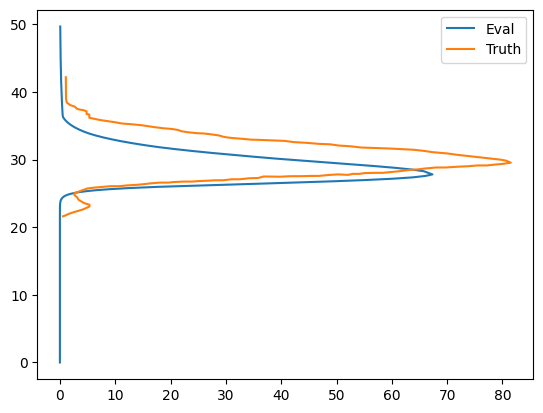

In [174]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(energy.dedz, energy.altitude*1e-3, label='Eval')
ax.plot(data.dedz, data.h, label='Truth')
plt.legend()
plt.show()